## **Project Goal**
We will build a Machine Learning model that predicts house prices based on features like:

- Area (square feet)
- Number of bedrooms
- Number of bathrooms
- Location (later)
- Price (target)

In [1]:
# Choose dataset
import kagglehub
path = kagglehub.dataset_download("harlfoxem/housesalesprediction")

100%|██████████| 780k/780k [00:00<00:00, 65.5MB/s]

Extracting files...


In [2]:
# detect file path
import os
csv_path = os.listdir(path)[0]
full_csv_path = os.path.join(path, csv_path)
full_csv_path

'/root/.cache/kagglehub/datasets/harlfoxem/housesalesprediction/versions/1/kc_house_data.csv'

In [3]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(full_csv_path)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
#check null value
df.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [7]:
# check duplicate if duplicate exist then drop it
df.duplicated().sum()

np.int64(0)

In [8]:
# Drop unnessory colums
df = df[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'grade', 'price']]
df.head()

,bedrooms,bathrooms,sqft_living,floors,grade,price
0,3,1.00,1180,1.0,7,221900.0
1,3,2.25,2570,2.0,7,538000.0
2,2,1.00,770,1.0,6,180000.0
3,4,3.00,1960,1.0,7,604000.0
4,3,2.00,1680,1.0,8,510000.0


In [9]:
# Check how many columns and rows
df.shape

(21613, 6)

In [10]:
# analyze dataset professioally
df.describe()

,bedrooms,bathrooms,sqft_living,floors,grade,price
count,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04
mean,3.370842,2.114757,2079.899736,1.494309,7.656873,5.400881e+05
std,0.930062,0.770163,918.440897,0.539989,1.175459,3.671272e+05
min,0.000000,0.000000,290.000000,1.000000,1.000000,7.500000e+04
25%,3.000000,1.750000,1427.000000,1.000000,7.000000,3.219500e+05
50%,3.000000,2.250000,1910.000000,1.500000,7.000000,4.500000e+05
75%,4.000000,2.500000,2550.000000,2.000000,8.000000,6.450000e+05
max,33.000000,8.000000,13540.000000,3.500000,13.000000,7.700000e+06


In [11]:
# select features x & y

x = df[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'grade']]
y = df['price']

In [12]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [37]:
# Train Model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# model = LinearRegression()
# model = RandomForestRegressor(n_estimators=100, random_state=42)
model = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

y_pred[:5]

array([ 499616.72,  664680.2 ,  960724.5 , 2512377.  ,  631827.75],
      dtype=float32)

In [30]:
coeff_df = pd.DataFrame(model.coef_, x.columns, columns=['Coefficient'])
coeff_df

,Coefficient
bedrooms,-39524.077049
bathrooms,-9471.527508
sqft_living,219.338832
floors,-38838.435800
grade,99553.088374


In [31]:
#evaluate Linear Regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Linear Results")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")


Linear Results
MAE: 165353.23418831598
MSE: 67947489083.891426
RMSE: 260667.39167738534
R² Score: 0.5505426194978673


In [33]:
#evaluate Random Forest Regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae_rf = mean_absolute_error(y_test, y_pred)
mse_rf = mean_squared_error(y_test, y_pred)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred)

print("Random Forest Results")
print("MAE:", mae_rf)
print("RMSE:", rmse_rf)
print("R² Score:", r2_rf)

Random Forest Results
MAE: 164635.0879096183
RMSE: 270436.95306514984
R² Score: 0.5162208220344136


In [38]:
#evaluate XGB Regression
mae_xgb = mean_absolute_error(y_test, y_pred)
mse_xgb = mean_squared_error(y_test, y_pred)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred)

print("XGBoost Results")
print("MAE:", mae_xgb)
print("RMSE:", rmse_xgb)
print("R² Score:", r2_xgb)

XGBoost Results
MAE: 155078.34153438007
RMSE: 272057.939247959
R² Score: 0.5104039424928744


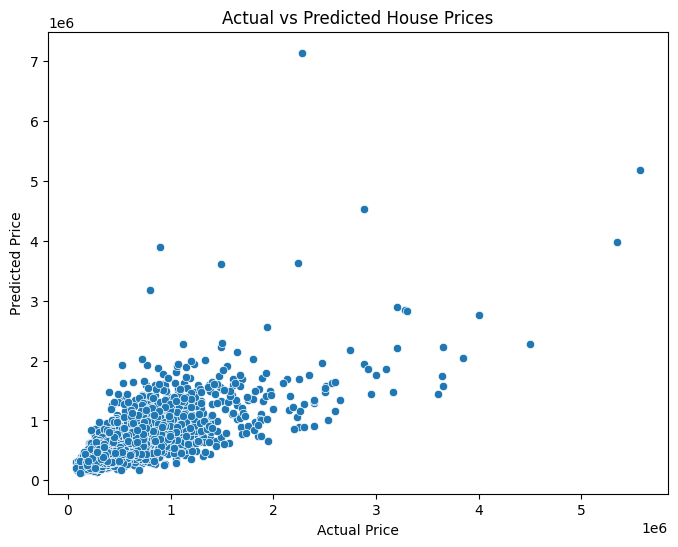

In [36]:
# data visulaization
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()

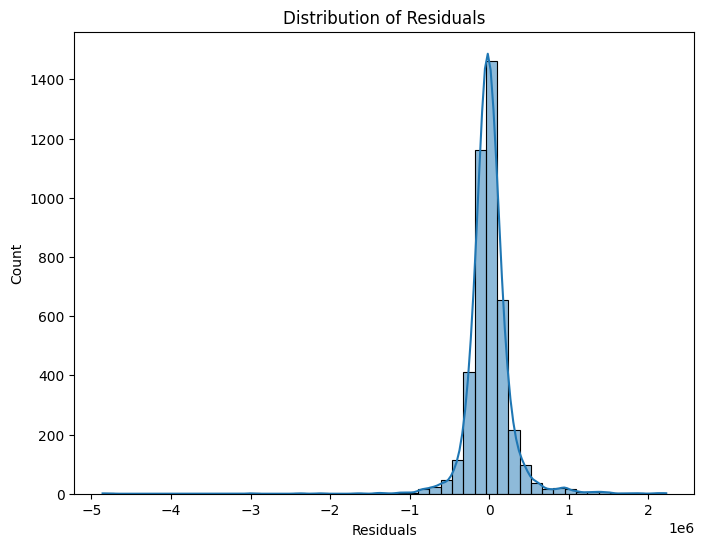

In [35]:
# residual plot
residuals = y_test - y_pred

plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=50, kde=True)
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()

In [40]:
import joblib

joblib.dump(model, 'model.joblib')

['model.joblib']